In [1]:
from utils.cloud_detection import get_s2_col, get_cloudscore_col, get_images
lon, lat = -3.857, 40.110
start_date = "2021-03-01"
end_date = "2023-03-01"
cloud_cover = 0.3
cs_cdf = 0.65
patch_size = 64

## Define the bands
S2_BANDS = ["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B8A", "B9", "B11", "B12", "AOT"]
CLOUDSCORE_BANDS = ["cloud_score"]

# Obtener la colección de imágenes con CloudScore
image_collection = get_s2_col(lat, lon, start_date, end_date, cloud_cover, patch_size)
cloudmask_collection = get_cloudscore_col(lat, lon, start_date, end_date, cs_cdf, patch_size, image_collection)

# Obtener la colección de imágenes y su metadata
s2_images, s2_profile = get_images(lat, lon, image_collection, S2_BANDS, patch_size)
cloudscore_images, cloudscore_profile = get_images(lat, lon, cloudmask_collection, CLOUDSCORE_BANDS, patch_size)

print("S2 Image Collection Length:", len(s2_images))
print("CloudScore Image Collection Length:", len(cloudscore_images))

Original collection size: 154
Filtered collection size: 154
Collection with cloud score size: 154
UTM CRS: 32630
UTM CRS: 32630
S2 Image Collection Length: 154
CloudScore Image Collection Length: 154


In [2]:
#Order the mask by the class 
indexs_cloud = {}
for index in range(len(cloudscore_images)):
    mask = cloudscore_images[index]['image'].squeeze()
    binary_mask = mask > 0.65
    # Count the number of pixels 0 (cloud)
    num_cloud_pixels = (binary_mask == 0).sum()
    # CReate a dict with the index and the number of pixels
    indexs_cloud[index] = num_cloud_pixels

# Sort the dictionary by value
sorted_indexs = sorted(indexs_cloud.items(), key=lambda x: x[1], reverse=True)
print("Sorted Indexes by Cloud Pixels:", sorted_indexs)

Sorted Indexes by Cloud Pixels: [(66, 4096), (123, 4076), (83, 4051), (86, 3036), (55, 1286), (35, 812), (153, 335), (129, 94), (102, 14), (152, 1), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (53, 0), (54, 0), (56, 0), (57, 0), (58, 0), (59, 0), (60, 0), (61, 0), (62, 0), (63, 0), (64, 0), (65, 0), (67, 0), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (73, 0), (74, 0), (75, 0), (76, 0), (77, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0), (84, 0), (85, 0), (87, 0), (88, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.077..1.978].


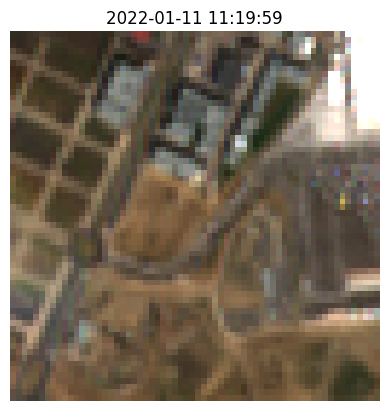

In [48]:
import matplotlib.pyplot as plt
from skimage.measure import find_contours
index = 68

# Plot the RGB image and the contours
date = s2_images[index]['date']
mask = cloudscore_images[index]['image'].squeeze()
contours = find_contours(mask,0.65)
fig, ax = plt.subplots()
ax.imshow(s2_images[index]['image'].squeeze()[[3, 2, 1]].transpose(1,2,0) * 2.5 / 10000)
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')
plt.title(f"{date}")
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.10725..1.175].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.117..1.581].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.08625000000000001..1.611].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.11275..1.154].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1145..1.23].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.15975..1.034].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.09025..1.1500000000000001].
Clipping inpu

Selected indices: [10, 55, 92, 123, 153]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.073..1.583].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.10475..1.482].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.2985..2.232].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.088..1.434].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1135..1.40475].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1115..1.47225].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.127..2.234].
Clipping input data to the valid range 

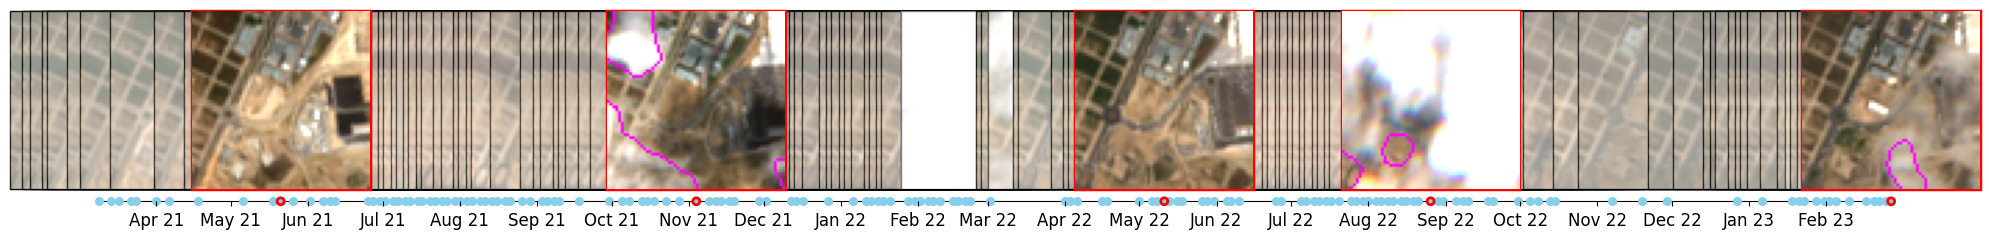

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.dates import DateFormatter
from skimage import measure

dates = [s2_images[i]["date"] for i in range(len(s2_images))]  # Fechas de las imágenes
datas = [s2_images[i]["image"] for i in range(len(s2_images))]  # Imágenes originales

# Añadir su respectivo cloud_mask
cloud_masks = [cloudscore_images[i]["image"].squeeze() for i in range(len(cloudscore_images))]  # Máscaras de nubes

# --- Asume que las listas `dates` y `datas` ya están definidas ---
dt_index = pd.to_datetime(dates, format="%Y-%m-%d %H:%M:%S")
df = pd.DataFrame({'image': datas,
                   'cloud': cloud_masks}, 
                   index=dt_index).sort_index()

# 1) Seleccionar hasta 4 miniaturas para resaltar
n = len(df)
idx = [10, 55, 92, 123, 153]
print(f"Selected indices: {idx}")
selected = df.iloc[idx]

# 2) Crear figura
fig, ax = plt.subplots(figsize=(2.5*8, 2.5))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.15)

# 3) Parámetros de visualización
target_h = 128     # Alto deseado en pixeles
alpha_bg = 0.5     # Transparencia del fondo
y0 = 0             # Línea base para miniaturas y puntos

# 4) Spine X por debajo de y0
ax.spines['bottom'].set_position(('data', -0.01))
ax.spines['bottom'].set_zorder(0)

# 5) Dibujar miniaturas de fondo en y0
for dt, row in df.iterrows():
    arr = row['image']

    # Extraer RGB (bandas 3,2,1 o primeras 3 canales)
    try:
        rgb = arr[[3,2,1], :, :].transpose(1,2,0) * (2.5/10000)
    except:
        rgb = arr[:3].transpose(1,2,0) * (2.5/10000)

    h, w, _ = rgb.shape
    zoom = target_h / h
    thumb = OffsetImage(rgb, zoom=zoom, alpha=alpha_bg)
    ab = AnnotationBbox(thumb, (dt, y0),
                        xycoords='data', box_alignment=(0.5,0),
                        bboxprops=dict(edgecolor='black', linewidth=1),
                        frameon=True, pad=0, zorder=1)
    ax.add_artist(ab)

# 6) Dibujar puntos de adquisición en y0, sin recorte
ax.margins(x=0.02)
ax.set_xlim(df.index.min(), df.index.max())
# ¡IMPORTANTE! Llama a esta línea tras definir límites y spine:
y_min = ax.get_ylim()[0]

ax.scatter(df.index, [y_min -0.01]*n, s=30, color='skyblue', zorder=1,
           label='Adquisiciones', clip_on=False)

# 7) Dibujar miniaturas seleccionadas en y0 y rodearlas con círculo rojo
for dt, row in selected.iterrows():
    arr = row['image']
    cloud = row['cloud']
    try:
        rgb = arr[[3,2,1], :, :].transpose(1,2,0) * (2.5/10000)
    except:
        rgb = arr[:3].transpose(1,2,0) * (2.5/10000)

    # extraigo contornos
    contours = measure.find_contours(cloud, 0.5)
    for c in contours:
        coords = np.round(c).astype(int)
        for y, x in coords:
            if 0 <= y < rgb.shape[0] and 0 <= x < rgb.shape[1]:
                rgb[y, x, :] = [1.0, 0.0, 1.0]

    h, w, _ = rgb.shape
    zoom = target_h / h
    # miniatura opaca
    thumb_sel = OffsetImage(rgb, zoom=zoom, alpha=1)
    ab_sel = AnnotationBbox(thumb_sel, (dt, y0),
                            xycoords='data', box_alignment=(0.5,0),
                            frameon=True, pad=0, 
                            bboxprops=dict(edgecolor='red', linewidth=2.5),
                            zorder=3)
    ax.add_artist(ab_sel)
    # círculo rojo
    ax.scatter([dt], [y_min -0.01], s=25, facecolors='none',
               edgecolors='red', linewidths=2, zorder=1, clip_on=False)

# 9) Ajustar límites y ticks
ax.set_xticks(pd.date_range(df.index.min(), df.index.max(), freq='MS'))
ax.xaxis.set_major_formatter(DateFormatter("%b %y"))
ax.tick_params(axis='x', rotation=0, labelsize=12)

# 10) Limpieza estética
ax.set_yticks([])
ax.set_ylim(y_min, 0.15)
for sp in ['left','right','top']:
    ax.spines[sp].set_visible(False)
ax.set_xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Implementar el algoritmo CloudSEN 12 + aquí
import numpy as np
cloud_model_path = "/home/tidop/projects/RefImSR/RRSGAN/weight/UNetMobV2_V2.pt"
cloud_masks = []
for i, arr_list in enumerate(images):
    data = arr_list["image"]
    date = arr_list["date"]
    mask = cloud_model(cloud_model_path, data)
    mask = np.array(mask)    
    # Append the mask to the list
    cloud_masks.append(mask)
    print(f"Image {i+1}/{len(images)} processed")

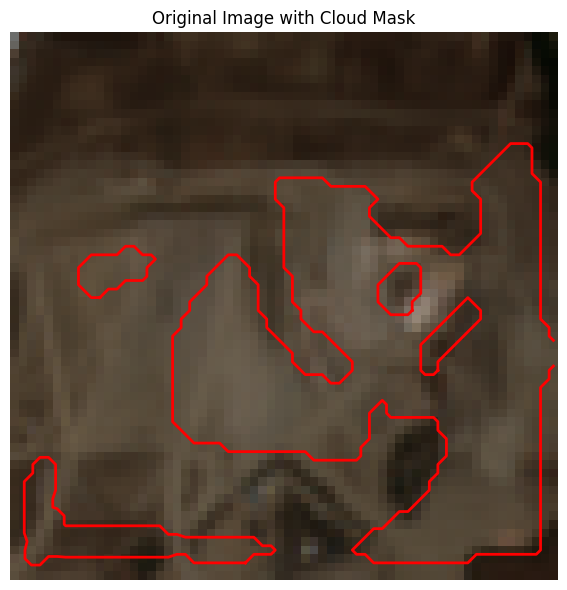

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from skimage import measure

# Definir categorías y colores para la máscara de nubes
categories = {
    0: "Clear",       # Sin nubes
    1: "Thick Cloud",      # Nublado
    2: "Thin Cloud",      # Sombra de nubes
    3: "Cloud Shadow" # Sin clasificar
}

# Crear un colormap personalizado
colors = {
    0: "#1f77b4",  # Azul para "Clear"
    1: "#ff7f0e",  # Naranja para "Cloudy"
    2: "#2ca02c",  # Verde para "Shadow"
    3: "#d62728"   # Rojo para "Unclassified"
}
cmap = plt.matplotlib.colors.ListedColormap([colors[key] for key in categories.keys()])

# Crear la figura y los ejes
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Mostrar la imagen original
ax.imshow(images[0]["image"][[3, 2, 1]].transpose(1, 2, 0) * (1/ 10000))
ax.set_title("Original Image with Cloud Mask")

# Calcular los contornos de la máscara de nubes
contours = measure.find_contours(cloud_masks[0], level=0.5)

# Mostrar la máscara de nubes
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], color='red', linewidth=2, transform=ax.transData)

# # Crear una leyenda personalizada
# legend_patches = [mpatches.Patch(color=colors[key], label=label) for key, label in categories.items()]
# ax[1].legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.axis('off')
plt.tight_layout()
plt.show()

In [64]:
s2_profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 64, 'height': 64, 'count': 13, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 30N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32630"]]'), 'transform': Affine(10.0, 0.0, 426643.7865558091,
       0.0, -10.0, 4440638.178576668), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'pixel'}

In [65]:
# Guardar las imágenes y las mascaras
import pathlib
import rasterio as rio

IMAGE_DIR = pathlib.Path("outputs/Illescas")
IMAGE_DIR.mkdir(parents=True, exist_ok=True)

for i, arr_list in enumerate(s2_images):
    data = arr_list["image"]
    date = arr_list["date"]
    mask = cloud_masks[i]
    
    # Guardar la imagen original
    image_path = IMAGE_DIR / f"{date}.tif"
    with rio.open(image_path, 'w',**s2_profile) as dst:
        dst.write(data)

    print(f"Image {i+1}/{len(s2_images)} saved at {image_path}")

Image 1/154 saved at outputs/Illescas/2021-03-09 11:10:06.tif
Image 2/154 saved at outputs/Illescas/2021-03-14 11:10:06.tif
Image 3/154 saved at outputs/Illescas/2021-03-17 11:20:02.tif
Image 4/154 saved at outputs/Illescas/2021-03-22 11:20:01.tif
Image 5/154 saved at outputs/Illescas/2021-03-24 11:10:05.tif
Image 6/154 saved at outputs/Illescas/2021-04-01 11:20:00.tif
Image 7/154 saved at outputs/Illescas/2021-04-06 11:20:00.tif
Image 8/154 saved at outputs/Illescas/2021-04-18 11:10:01.tif
Image 9/154 saved at outputs/Illescas/2021-05-06 11:20:00.tif
Image 10/154 saved at outputs/Illescas/2021-05-18 11:10:07.tif
Image 11/154 saved at outputs/Illescas/2021-05-21 11:20:03.tif
Image 12/154 saved at outputs/Illescas/2021-05-26 11:20:03.tif
Image 13/154 saved at outputs/Illescas/2021-06-02 11:10:07.tif
Image 14/154 saved at outputs/Illescas/2021-06-07 11:10:07.tif
Image 15/154 saved at outputs/Illescas/2021-06-10 11:20:03.tif
Image 16/154 saved at outputs/Illescas/2021-06-12 11:10:08.tif
I

In [72]:
import re
from utils.sr_models import process_superresolution

img_files = sorted(list(IMAGE_DIR.glob("*.tif")))
regex = re.compile(r"\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.tif")
s2_files = sorted([file for file in img_files if regex.match(file.name)])
for i, s2_file in enumerate(s2_files[-2:]):
    with rio.open(s2_file) as src:
        profile = src.profile       
        #Update dtype and count
        profile.update(dtype=rio.float32, count=3, width=256, height=256)
        # Update the transform
        transform = src.transform
        new_a = transform.a /4
        new_e = transform.e /4
        new_transform = transform._replace(a=new_a, e=new_e)
        profile.update(transform=new_transform)

        array = process_superresolution(folder_path=IMAGE_DIR, s2_path=s2_file, return_array=True)
        out_name = "sr_" + s2_file.name.split(" ")[0] + ".tif"
        with rio.open(IMAGE_DIR / out_name, 'w', **profile) as dst:
            dst.write(array, indexes=[1, 2, 3])

            print(f"[INFO] {i+1}/{len(s2_files)}: {s2_file.name} processed and saved as {out_name}")
  

426643.7865558091 4439998.178576668 427283.7865558091 4440638.178576668
EPSG:32630
La imagen de referencia ya existe. Usando la imagen existente.
(3, 64, 64) (3, 256, 256) (3, 256, 256) (3, 256, 256)
[INFO] 1/154: 2023-02-25 11:20:03.tif processed and saved as sr_2023-02-25.tif
426643.7865558091 4439998.178576668 427283.7865558091 4440638.178576668
EPSG:32630
La imagen de referencia ya existe. Usando la imagen existente.
(3, 64, 64) (3, 256, 256) (3, 256, 256) (3, 256, 256)
[INFO] 2/154: 2023-02-27 11:10:04.tif processed and saved as sr_2023-02-27.tif
